In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [43]:
#Loading dataframes from all the 4 semesters
grades20161 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/4778d3ce-8898-46a8-a623-ee6a480a2980/download/matriculas-de-2016.1.csv', sep=';')
grades20162 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv', sep=';')
grades20171 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171', sep=';')
grades20172 = pd.read_csv('http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172', sep=';')

In [44]:
#Removing a undefined column from the 2016.1 and 2016.2 dataframes
grades20161 = grades20161.drop('Unnamed: 10',1)
grades20162 = grades20162.drop('Unnamed: 10',1)

In [45]:
#Function for filtering data to get only the valid enrollments
def filter_columns(df):
    df = df.drop(df[df.descricao == 'DESISTENCIA'].index)
    df = df.drop(df[df.descricao == 'CANCELADO'].index)
    df = df.drop(df[df.descricao == 'INDEFERIDO'].index)
    df = df.drop(df[df.descricao == 'REPROVADO POR MÉDIA E POR FALTAS'].index)
    df = df.drop(df[df.descricao == 'CANCELADO'].index)
    df = df.drop(df[df.descricao == 'EXCLUIDA'].index)
    df = df.drop(df[df.descricao == 'TRANCADO'].index)
    df = df.drop(df[df.descricao == 'AGUARDANDO DEFERIMENTO'].index)
    df = df.drop(df[df.descricao == 'REPROVADO POR NOTA E FALTA'].index)
    df = df.drop(df[df.descricao == 'CUMPRIU'].index)
    df = df.drop(df[df.descricao == 'DISPENSADO'].index)
    df = df.drop(df[df.descricao == 'TRANSFERIDO'].index)
    df = df.drop(df[df.descricao == 'INCORPORADO'].index)
    return df

In [46]:
#Filtering data to get only the valid enrollments from 2016.1
grades20161 = filter_columns(grades20161)

In [47]:
#Filtering data to get only the valid enrollments from 2016.2
grades20162 = filter_columns(grades20162)

In [48]:
#Filtering data to get only the valid enrollments from 2017.1
grades20171 = filter_columns(grades20171)

In [49]:
#Filtering data to get only the valid enrollments from 2017.2
grades20172 = filter_columns(grades20172)

In [50]:
#Function to remove columns that are not used
def remove_columns(df):
    df = df.drop(['unidade', 'nota', 'reposicao', 'faltas_unidade', 'numero_total_faltas', 'descricao'], 1)
    return df

In [51]:
#Removing columns that are not used
grades20161 = remove_columns(grades20161)
grades20162 = remove_columns(grades20162)
grades20171 = remove_columns(grades20171)
grades20172 = remove_columns(grades20172)

In [52]:
#Removing missing values
grades20161.dropna(inplace=True)
grades20162.dropna(inplace=True)
grades20171.dropna(inplace=True)
grades20172.dropna(inplace=True)

In [53]:
#Each student is shown 3 times for each enrollment, but the final grade is the same for all the 3, so we are filtering that
grades20161 = grades20161.drop_duplicates(subset = ['id_turma','discente'])
grades20162 = grades20162.drop_duplicates(subset = ['id_turma','discente'])
grades20171 = grades20171.drop_duplicates(subset = ['id_turma','discente'])
grades20172 = grades20172.drop_duplicates(subset = ['id_turma','discente'])

In [54]:
#We can now remove the column 'id_turma' from the dataframes
grades20161 = grades20161.drop('id_turma', 1)
grades20162 = grades20162.drop('id_turma', 1)
grades20171 = grades20171.drop('id_turma', 1)
grades20172 = grades20172.drop('id_turma', 1)

In [55]:
#We are storing the number of enrollments for each student
enrollments20161 = grades20161.discente.value_counts()
enrollments20162 = grades20162.discente.value_counts()
enrollments20171 = grades20171.discente.value_counts()
enrollments20172 = grades20172.discente.value_counts()

In [56]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20161(row):
    return enrollments20161[row.discente]
grades20161['num_matriculas'] = grades20161.apply(funcenrollments20161, axis=1)

In [57]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20162(row):
    return enrollments20162[row.discente]
grades20162['num_matriculas'] = grades20162.apply(funcenrollments20162, axis=1)

In [58]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20171(row):
    return enrollments20171[row.discente]
grades20171['num_matriculas'] = grades20171.apply(funcenrollments20171, axis=1)

In [59]:
#Now the number of enrollments is being stored in the column 'num_matriculas'
def funcenrollments20172(row):
    return enrollments20172[row.discente]
grades20172['num_matriculas'] = grades20172.apply(funcenrollments20172, axis=1)

In [60]:
#Now we stored the mean of all the final grades for each student
meangrades20161 = grades20161.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20162 = grades20162.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20171 = grades20171.pivot_table(index="discente", values="media_final", aggfunc=np.mean)
meangrades20172 = grades20172.pivot_table(index="discente", values="media_final", aggfunc=np.mean)

In [61]:
#The 'media_final' column's values will no more be used
grades20161 = grades20161.drop('media_final', 1)
grades20162 = grades20162.drop('media_final', 1)
grades20171 = grades20171.drop('media_final', 1)
grades20172 = grades20172.drop('media_final', 1)

In [62]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20161(row):
    return meangrades20161.get_value(row.discente, 'media_final')
grades20161['media_final'] = grades20161.apply(store_values20161, axis=1)

/home/anderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [63]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20162(row):
    return meangrades20162.get_value(row.discente, 'media_final')
grades20162['media_final'] = grades20162.apply(store_values20162, axis=1)

/home/anderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [64]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20171(row):
    return meangrades20171.get_value(row.discente, 'media_final')
grades20171['media_final'] = grades20171.apply(store_values20171, axis=1)

/home/anderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [65]:
#Now we store the mean of all final grades by student in the new column 'media_final'
def store_values20172(row):
    return meangrades20172.get_value(row.discente, 'media_final')
grades20172['media_final'] = grades20172.apply(store_values20172, axis=1)

/home/anderson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20161 = grades20161.drop_duplicates(subset = ['discente'])

In [67]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20162 = grades20162.drop_duplicates(subset = ['discente'])

In [68]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20171 = grades20171.drop_duplicates(subset = ['discente'])

In [69]:
#Now we remove the duplicates based on the student id, letting just the mean of all final grades by each student
grades20172 = grades20172.drop_duplicates(subset = ['discente'])

In [70]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20161 = grades20161.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [71]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20162 = grades20162.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [72]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20171 = grades20171.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [73]:
#Now that we have the mean of students final grades, we can finally use it to calcule the mean of grades by course
grades_by_course20172 = grades20172.pivot_table(index = ['id_curso', 'num_matriculas'], values = 'media_final', aggfunc=np.mean)

In [74]:
#Now we store the id of each course, for use it in the analysis
ti_id = 92127264.0
cb_id = 111635035.0
cet_id = 10320810.0
hist_id = 111635060.0

In [75]:
#Now we have to store the grades for each course in 2016.1
ti_grades_20161 = []
cb_grades_20161 = []
cet_grades_20161 = []
hist_grades_20161 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20161.append(grades_by_course20161.media_final[ti_id][x])
    cb_grades_20161.append(grades_by_course20161.media_final[cb_id][x])
    cet_grades_20161.append(grades_by_course20161.media_final[cet_id][x])
    hist_grades_20161.append(grades_by_course20161.media_final[hist_id][x])

In [76]:
#Now we have to store the grades for each course in 2016.2
ti_grades_20162 = []
cb_grades_20162 = []
cet_grades_20162 = []
hist_grades_20162 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20162.append(grades_by_course20162.media_final[ti_id][x])
    cb_grades_20162.append(grades_by_course20162.media_final[cb_id][x])
    cet_grades_20162.append(grades_by_course20162.media_final[cet_id][x])
    hist_grades_20162.append(grades_by_course20162.media_final[hist_id][x])

In [77]:
#Now we have to store the grades for each course in 2017.1
ti_grades_20171 = []
cb_grades_20171 = []
cet_grades_20171 = []
hist_grades_20171 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20171.append(grades_by_course20171.media_final[ti_id][x])
    cb_grades_20171.append(grades_by_course20171.media_final[cb_id][x])
    cet_grades_20171.append(grades_by_course20171.media_final[cet_id][x])
    hist_grades_20171.append(grades_by_course20171.media_final[hist_id][x])

In [78]:
#Now we have to store the grades for each course in 2017.2
ti_grades_20172 = []
cb_grades_20172 = []
cet_grades_20172 = []
hist_grades_20172 = []
#Here we are storing the mean of the courses final grades by number of enrollments
for x in range(1, 8):
    ti_grades_20172.append(grades_by_course20172.media_final[ti_id][x])
    cb_grades_20172.append(grades_by_course20172.media_final[cb_id][x])
    cet_grades_20172.append(grades_by_course20172.media_final[cet_id][x])
    hist_grades_20172.append(grades_by_course20172.media_final[hist_id][x])

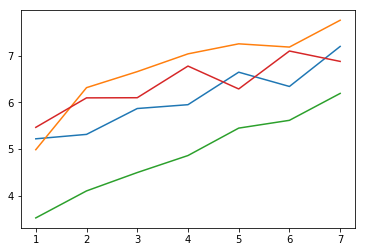

In [79]:
plt.plot(range(1,8),ti_grades_20172)
plt.plot(range(1,8),cb_grades_20172)
plt.plot(range(1,8),cet_grades_20172)
plt.plot(range(1,8),hist_grades_20172)
plt.show()

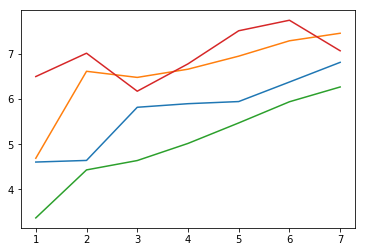

In [80]:
plt.plot(range(1,8),ti_grades_20161)
plt.plot(range(1,8),cb_grades_20161)
plt.plot(range(1,8),cet_grades_20161)
plt.plot(range(1,8),hist_grades_20161)
plt.show()

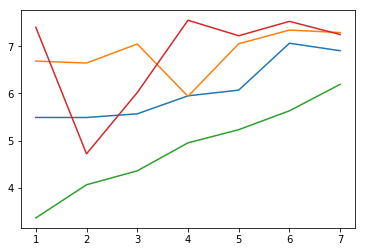

In [81]:
plt.plot(range(1,8),ti_grades_20162)
plt.plot(range(1,8),cb_grades_20162)
plt.plot(range(1,8),cet_grades_20162)
plt.plot(range(1,8),hist_grades_20162)
plt.show()

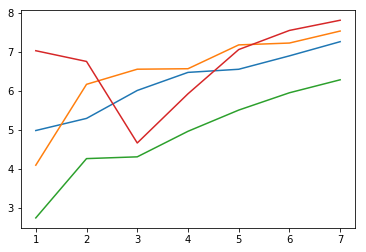

In [82]:
plt.plot(range(1,8),ti_grades_20171)
plt.plot(range(1,8),cb_grades_20171)
plt.plot(range(1,8),cet_grades_20171)
plt.plot(range(1,8),hist_grades_20171)
plt.show()